In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler  # 标准化
from sklearn.model_selection import train_test_split  # 划分测试集与训练集
from sklearn.linear_model import LinearRegression as LR  # 回归模块

# 在ipython中直接显示图像
%matplotlib inline

# 设置绘图显示中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [22]:
input_file_path = '房产信息_预处理.xlsx'
data = pd.read_excel(input_file_path)

In [23]:
data.columns

Index(['描述', '位置信息', '区域', '总价', '单价', '面积', '建成时间', '关注人数', '0室0厅', '0室1厅',
       '1室0厅', '1室1厅', '1室2厅', '2室0厅', '2室1厅', '2室2厅', '3室0厅', '3室1厅', '3室2厅',
       '3室3厅', '3室4厅', '4室0厅', '4室1厅', '4室2厅', '4室3厅', '4室4厅', '5室0厅', '5室1厅',
       '5室2厅', '5室3厅', '5室4厅', '6室1厅', '6室2厅', '6室3厅', '6室4厅', '7室1厅', '7室2厅',
       '7室3厅', '7室4厅', '7室5厅', '8室2厅', '8室3厅', '9室2厅', '双流', '大邑', '天府新区',
       '天府新区南区', '崇州', '彭州', '成华', '新津', '新都', '武侯', '温江', '简阳', '蒲江', '郫都',
       '都江堰', '金堂', '金牛', '锦江', '青白江', '青羊', '高新', '高新西', '龙泉驿', '毛坯', '简装',
       '精装', '塔楼', '平房', '板塔结合', '板楼', '东', '南', '西', '北', '东北', '东南', '西南',
       '西北', '中楼层', '低楼层', '高楼层', '总楼层'],
      dtype='object')

In [5]:
# 特征提取
total_price = data.总价
unit_price = data.单价
house_area = data.面积
house_type = data[['0室1厅','1室0厅', '1室1厅', '1室2厅', '2室0厅', '2室1厅', \
                   '2室2厅', '3室0厅', '3室1厅', '3室2厅','3室3厅', '3室4厅', \
                   '4室0厅', '4室1厅', '4室2厅', '4室3厅', '4室4厅', '5室0厅',\
                   '5室1厅','5室2厅', '5室3厅', '5室4厅', '6室1厅', '6室2厅', \
                   '6室3厅', '6室4厅', '7室1厅', '7室2厅','7室3厅', '7室4厅', \
                   '7室5厅', '8室2厅', '8室3厅', '9室2厅']]
region = data[['双流', '大邑', '天府新区','天府新区南区', '崇州', '彭州', '成华', \
               '新津', '新都', '武侯', '温江', '简阳', '蒲江', '郫都','都江堰',   \
               '金堂', '金牛', '锦江', '青白江', '青羊', '高新']]
house_class = data[['塔楼', '平房', '板塔结合', '板楼']]
house_dirt = data[['东', '南', '西', '北', '东北', '东南', '西南','西北']]
house_layer = data[['中楼层', '低楼层', '高楼层']]
total_layer = data.总楼层

In [6]:
# 单变量回归
X = pd.concat([house_area, house_type, region, house_class, house_dirt, \
               house_layer, total_layer], axis=1)
Y = unit_price

In [15]:
# 设置训练集与测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,
                        test_size=0.2, random_state=420)
display(Xtest.head())
display(Ytest.head())

,面积,0室1厅,1室0厅,1室1厅,1室2厅,2室0厅,2室1厅,2室2厅,3室0厅,3室1厅,...,西,北,东北,东南,西南,西北,中楼层,低楼层,高楼层,总楼层
9428,128.80,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,18
19018,79.00,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,6
10968,96.54,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,7
18072,126.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7
25119,93.58,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,7


9428     1.26
19018    1.76
10968    1.09
18072    0.95
25119    1.38
Name: 单价, dtype: float64

In [10]:
# 线性回归
reg = LR().fit(Xtrain, Ytrain)
# 预测
yhat = reg.predict(Xtest)
# 查看回归系数
print(pd.Series(list(zip(X.columns, reg.coef_))))
# 查看截距
print("截距 = %f"%reg.intercept_)

0        (面积, 0.0011125764634655644)
1     (0室1厅, 1.4727802311043092e-14)
2        (1室0厅, 0.32529050222708866)
3          (1室1厅, 0.513283884040626)
4          (1室2厅, 0.589636663592678)
                   ...              
67       (西北, -0.007954603846578139)
68    (中楼层, -6.0801559900458546e-05)
69         (低楼层, 0.0250406642783233)
70       (高楼层, -0.02497986271840935)
71        (总楼层, 0.01638329480039885)
Length: 72, dtype: object
截距 = 0.223569


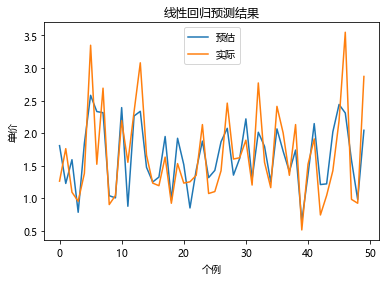

In [11]:
# 绘制前n条记录
n = 50
# 绘制模型估计值
plt.plot(range(len(yhat[:n])),yhat[:n])
# 绘制模型实际值
plt.plot(range(len(Ytest[:n])),Ytest[:n])

# 图形设置
plt.xlabel('个例')
plt.ylabel('单价')
plt.title('线性回归预测结果')
plt.legend(["预估","实际"])

In [21]:
# 用于检验模型效果
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error  # MAE
from sklearn.metrics import r2_score  # R2

mse = mean_squared_error(Ytest, yhat)  # MSE
mae = mean_absolute_error(Ytest, yhat)  # MAE
r2 = r2_score(Ytest, yhat)  # R2
# 调整R2
n = Xtest.shape[0]
k = Xtest.shape[1]
print("n = %d, k = %d"%(n,k))
adj_r2 = 1-(1-r2)*((n-1)/(n-k-1))

print('MSE : ' + str(mse))
print('MAE : ' + str(mae))
print('R2 : ' + str(r2))
print('调整R2 ：' + str(adj_r2))
print(reg.score(Xtrain,Ytrain))

n = 6555, k = 72
MSE : 0.17934182585989458
MAE : 0.30161214689251603
R2 : 0.5455564705110019
调整R2 ：0.5405086559285879
0.5433315520147274
